## Reproduction of classic SCM experiments
The following **very informative material** was used as a reference <br>
["15 - Synthetic Control" Causal Inference for The Brave and True ](https://matheusfacure.github.io/python-causality-handbook/15-Synthetic-Control.html)

In [1]:
import warnings

warnings.filterwarnings("ignore")

import sys
import os

sys.path.append(os.path.abspath("../"))

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from tqdm import tqdm

from synthdid.model import SynthDID


In [2]:
raw_df = pd.read_csv(
    "https://raw.githubusercontent.com/matheusfacure/python-causality-handbook/master/causal-inference-for-the-brave-and-true/data/smoking.csv"
)
raw_df.head()

,state,year,cigsale,lnincome,beer,age15to24,retprice,california,after_treatment
0,1,1970,89.800003,NaN,NaN,0.178862,39.599998,False,False
1,1,1971,95.400002,NaN,NaN,0.179928,42.700001,False,False
2,1,1972,101.099998,9.498476,NaN,0.180994,42.299999,False,False
3,1,1973,102.900002,9.550107,NaN,0.182060,42.099998,False,False
4,1,1974,108.199997,9.537163,NaN,0.183126,43.099998,False,False


In [3]:
df= raw_df.pivot(index='state', columns="year")["cigsale"].T
df.head()

state,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
year,,,,,,,,,,,,,,,,,,,,,
1970,89.800003,100.300003,123.000000,124.800003,120.000000,155.000000,109.900002,102.400002,124.800003,134.600006,...,103.599998,92.699997,99.800003,106.400002,65.500000,122.599998,124.300003,114.500000,106.400002,132.199997
1971,95.400002,104.099998,121.000000,125.500000,117.599998,161.100006,115.699997,108.500000,125.599998,139.300003,...,115.000000,96.699997,106.300003,108.900002,67.699997,124.400002,128.399994,111.500000,105.400002,131.699997
1972,101.099998,103.900002,123.500000,134.300003,110.800003,156.300003,117.000000,126.099998,126.599998,149.199997,...,118.699997,103.000000,111.500000,108.599998,71.300003,138.000000,137.000000,117.500000,108.800003,140.000000
1973,102.900002,108.000000,124.400002,137.899994,109.300003,154.699997,119.800003,121.800003,124.400002,156.000000,...,125.500000,103.500000,109.699997,110.400002,72.699997,146.800003,143.100006,116.599998,109.500000,141.199997
1974,108.199997,109.699997,126.699997,132.800003,112.400002,151.300003,123.699997,125.599998,131.899994,159.600006,...,129.699997,108.400002,114.800003,114.699997,75.599998,151.800003,149.600006,119.900002,111.800003,145.800003


In [4]:
#df = fetch_CaliforniaSmoking()

PRE_TEREM = [1970, 1988]
POST_TEREM = [1989, 2000]

TREATMENT = [3] #"California"

sdid = SynthDID(df, PRE_TEREM, POST_TEREM, TREATMENT)

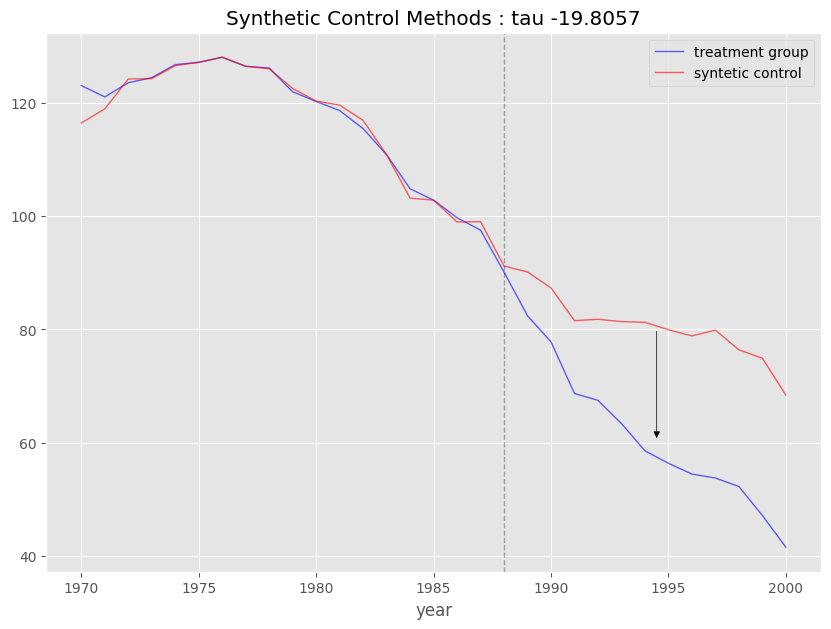

In [5]:
sdid.fit(zeta_type="base")
hat_omega_simple = sdid.estimated_params(model="sc")
sdid.plot(model="sc")

In [6]:
# features = ["retprice", "age15to24", "lnincome"]

# additional_df = (
#     raw_df.query("year <= 1988").pivot(index="state", columns="year")[features].T
# )
# additional_df.head()

# additional_df = additional_df.dropna()

In [7]:
# In this case, we aggregated features using averages, etc., to reduce the amount of computation.
features = ["retprice", "age15to24", "lnincome"]
additional_df = pd.concat(
    [
        raw_df.query("year <= 1988").groupby("state")[features].mean().T,
        pd.DataFrame(np.log(df.loc[1988] / df.loc[1970])).T,
        pd.DataFrame(df.query("year <= 1988").diff().mean()).T,
    ]
)
additional_df

state,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
retprice,66.994737,67.689473,66.636843,60.394737,77.368420,67.900000,63.594737,62.389474,66.868421,58.473684,...,56.831579,64.973684,64.647368,70.210527,64.178947,64.931579,53.784211,67.926316,69.878948,59.378948
age15to24,0.179464,0.169168,0.178662,0.184432,0.167361,0.181654,0.183468,0.160952,0.173347,0.179288,...,0.193207,0.180564,0.176556,0.183357,0.195291,0.182393,0.184799,0.170184,0.179282,0.180458
lnincome,9.632306,9.606481,10.031759,9.929731,10.105631,9.950567,9.752860,9.716291,9.988937,9.816424,...,9.625621,9.704052,9.688795,9.838702,9.662891,9.760267,9.884459,9.636039,9.852031,9.903308
0,0.221806,0.191749,-0.311264,-0.277055,-0.135438,-0.122714,0.121517,-0.192135,-0.148292,-0.004468,...,0.182965,-0.008667,0.227543,-0.097663,-0.174717,0.048557,0.040983,-0.048310,-0.036368,-0.145489
0,1.238889,1.177778,-1.827778,-1.677778,-0.844444,-0.994444,0.788889,-0.994445,-0.955556,-0.033334,...,1.155556,-0.044444,1.416667,-0.550000,-0.583333,0.338889,0.288889,-0.300000,-0.211111,-0.994444


In [8]:
additional_X = additional_df.drop(columns=3, axis=0)
additional_y = additional_df[3]

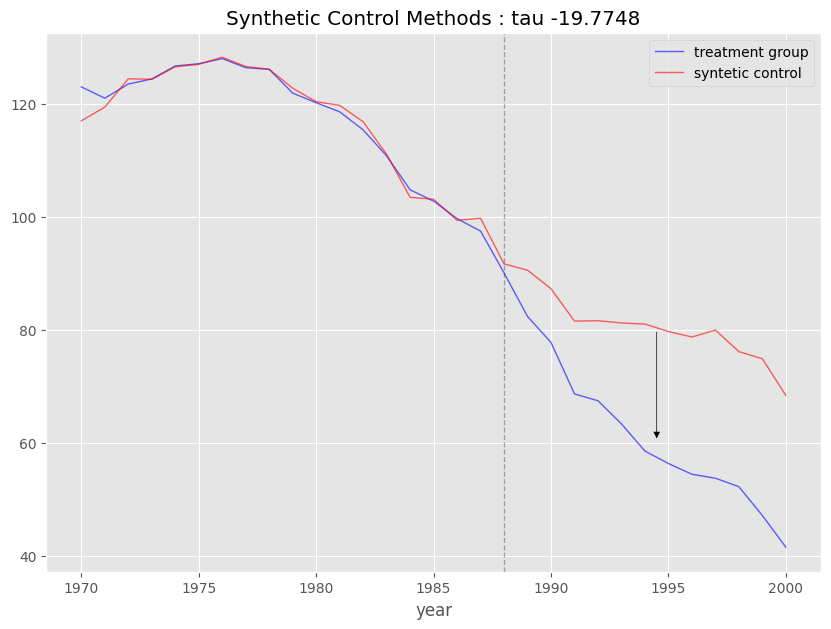

In [9]:
sdid.fit(zeta_type="base", additional_X=additional_X, additional_y=additional_y )
hat_omega_classic = sdid.estimated_params(model="sc")
sdid.plot(model="sc")

In [10]:
omega_result = pd.merge(
    hat_omega_simple.rename(columns={"sc_weight": "simple_weight"}),
    hat_omega_classic.rename(columns={"sc_weight": "classic_weight"}),
    on="features",
    how="left",
)
omega_result.sum()

features          777.0
simple_weight       1.0
classic_weight      1.0
dtype: float64

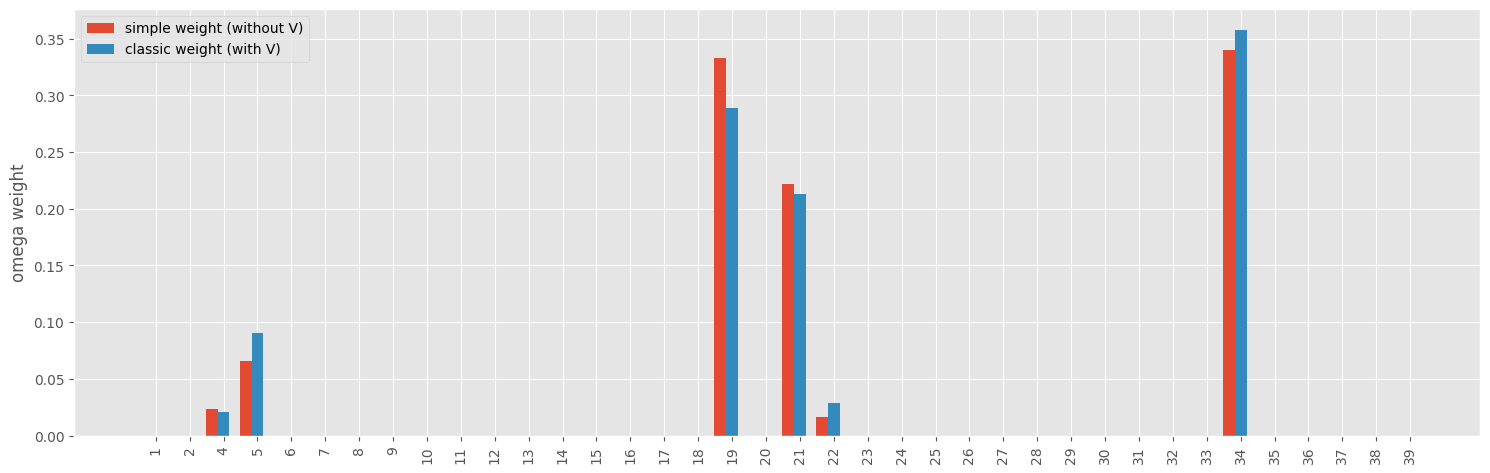

In [11]:
fig = plt.figure()
fig.set_figwidth(15)
ax = fig.add_subplot(1, 1, 1)
width = 0.35
ind = np.arange(len(omega_result))
ax.bar(
    ind - width, omega_result["simple_weight"], width, label="simple weight (without V)"
)
ax.bar(ind, omega_result["classic_weight"], width, label="classic weight (with V)")

ax.set_xticks(ind)
ax.set_xticklabels(omega_result["features"].values)
ax.legend()
ax.set_ylabel("omega weight")

fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [12]:
pre_mean = (
    raw_df.query("year <= 1988").groupby("state")[features + ["cigsale"]].mean().T
)
pre_mean_c = pre_mean.drop(columns=3)
pre_mean_t = pre_mean[3]

In [13]:
pre_mean_result = pd.DataFrame(pre_mean_t)
pre_mean_result.columns = ["California"]

In [14]:
pre_mean_result["naive_control_mean"] = pre_mean_c.T.mean()
pre_mean_result["simple_sc"] = pre_mean_c @ omega_result["simple_weight"].values
pre_mean_result["classic_sc"] = pre_mean_c @ omega_result["classic_weight"].values

In [15]:
pre_mean_result

,California,naive_control_mean,simple_sc,classic_sc
retprice,66.636843,64.504571,65.525479,65.808532
age15to24,0.178662,0.178345,0.179606,0.179863
lnincome,10.031759,9.792332,9.807221,9.813471
cigsale,116.210526,130.569529,115.936979,116.275584
